# RBC Model
 0.0.1 --> started 6 feb, combo of glyco and ppp models

In [55]:
import os
import re
import warnings
# from cobra.io import *
from cobra.io.json import load_json_model as load_json_cobra_model
import escher
import mass
import numpy as np
import pandas as pd
import equilibrator_api
from equilibrator_api import ComponentContribution, Q_
import sympy as sym
from cobra import Model, Reaction, Metabolite
import cobra.test
from os.path import join
from mass.util import qcqa
from mass.util import qcqa_model
from cobra import DictList
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io.json import save_json_model as save_json_mass_model
from mass.visualization import plot_comparison, plot_time_profile
from mass.visualization import (
    plot_ensemble_phase_portrait, plot_ensemble_time_profile)
mass_config = MassConfiguration()
mass_config.irreversible_Keq = float("inf")
print("MASSpy version: {0}".format(mass.__version__))
from six import iteritems
import matplotlib.pyplot as plt
from mass.thermo import (
    ConcSolver, sample_concentrations,
    update_model_with_concentration_solution)
# from cobra.io.json import *
import cobra_dict as c_d
import csv
import altair as alt
from minspan.minspan import minspan,nnz
from mass import (
    MassConfiguration, MassMetabolite, MassModel,
    MassReaction, Simulation, UnitDefinition)
from mass.io import json, sbml
from mass.util import qcqa_model

mass_config = MassConfiguration()

mass_config.irreversible_Keq = float("inf")
# from minspan import minspan,nnz

MASSpy version: 0.1.6


In [56]:
maps_dir = os.path.abspath("maps")
data_dir = os.path.abspath("data")
dir = os.path.abspath("")
model_dir = os.path.abspath("models")
minspan_dir= os.path.abspath("minspans_csv")


In [57]:
pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:,.3f}'.format
S_FONT = {"size": "small"}
L_FONT = {"size": "large"}
INF = float("inf")


### Loading MASS models

In [58]:
from mass.io import json

In [59]:
glycolysis = MassModel("Glycolysis")

In [60]:
glc__D_c = MassMetabolite(
    "glc__D_c",
    name="D-Glucose",
    formula="C6H12O6",
    charge=0,
    compartment="c",
    fixed=False)

g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

fdp_c = MassMetabolite(
    "fdp_c",
    name="D-Fructose 1,6-bisphosphate",
    formula="C6H10O12P2",
    charge=-4,
    compartment="c",
    fixed=False)

dhap_c = MassMetabolite(
    "dhap_c",
    name="Dihydroxyacetone phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

_13dpg_c = MassMetabolite(
    "_13dpg_c",
    name="3-Phospho-D-glyceroyl phosphate",
    formula="C3H4O10P2",
    charge=-4,
    compartment="c",
    fixed=False)

_3pg_c = MassMetabolite(
    "_3pg_c",
    name="3-Phospho-D-glycerate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

_2pg_c = MassMetabolite(
    "_2pg_c",
    name="D-Glycerate 2-phosphate",
    formula="C3H4O7P",
    charge=-3,
    compartment="c",
    fixed=False)

pep_c = MassMetabolite(
    "pep_c",
    name="Phosphoenolpyruvate",
    formula="C3H2O6P",
    charge=-3,
    compartment="c",
    fixed=False)

pyr_c = MassMetabolite(
    "pyr_c",
    name="Pyruvate",
    formula="C3H3O3",
    charge=-1,
    compartment="c",
    fixed=False)

lac__L_c = MassMetabolite(
    "lac__L_c",
    name="L-Lactate",
    formula="C3H5O3",
    charge=-1,
    compartment="c",
    fixed=False)

nad_c = MassMetabolite(
    "nad_c",
    name="Nicotinamide adenine dinucleotide",
    formula="[NAD]-C21H26N7O14P2",
    charge=-1,
    compartment="c",
    fixed=False)

nadh_c = MassMetabolite(
    "nadh_c",
    name="Nicotinamide adenine dinucleotide - reduced",
    formula="[NAD]-C21H27N7O14P2",
    charge=-2,
    compartment="c",
    fixed=False)

atp_c = MassMetabolite(
    "atp_c",
    name="ATP",
    formula="C10H12N5O13P3",
    charge=-4,
    compartment="c",
    fixed=False)

adp_c = MassMetabolite(
    "adp_c",
    name="ADP",
    formula="C10H12N5O10P2",
    charge=-3,
    compartment="c",
    fixed=False)

amp_c = MassMetabolite(
    "amp_c",
    name="AMP",
    formula="C10H12N5O7P",
    charge=-2,
    compartment="c",
    fixed=False)

pi_c = MassMetabolite(
    "pi_c",
    name="Phosphate",
    formula="HPO4",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

In [61]:
HEX1 = MassReaction(
    "HEX1",
    name="Hexokinase (D-glucose:ATP)",
    subsystem=glycolysis.id,
    reversible=True)
HEX1.add_metabolites({
    glc__D_c: -1,
    atp_c: -1,
    adp_c: 1,
    g6p_c: 1,
    h_c: 1})

PGI = MassReaction(
    "PGI",
    name="Glucose-6-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
PGI.add_metabolites({
    g6p_c: -1,
    f6p_c: 1})

PFK = MassReaction(
    "PFK",
    name="Phosphofructokinase",
    subsystem=glycolysis.id,
    reversible=True)
PFK.add_metabolites({
    f6p_c: -1,
    atp_c: -1,
    fdp_c: 1,
    adp_c: 1,
    h_c: 1})

FBA = MassReaction(
    "FBA",
    name="Fructose-bisphosphate aldolase",
    subsystem=glycolysis.id,
    reversible=True)
FBA.add_metabolites({
    fdp_c: -1,
    dhap_c: 1,
    g3p_c: 1})

TPI = MassReaction(
    "TPI",
    name="Triose-phosphate isomerase",
    subsystem=glycolysis.id,
    reversible=True)
TPI.add_metabolites({
    dhap_c: -1,
    g3p_c: 1})

GAPD = MassReaction(
    "GAPD",
    name="Glyceraldehyde-3-phosphate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
GAPD.add_metabolites({
    g3p_c: -1,
    nad_c: -1,
    pi_c: -1,
    _13dpg_c: 1,
    h_c: 1,
    nadh_c: 1})

PGK = MassReaction(
    "PGK",
    name="Phosphoglycerate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PGK.add_metabolites({
    _13dpg_c: -1,
    adp_c: -1,
    _3pg_c: 1,
    atp_c: 1})

PGM = MassReaction(
    "PGM",
    name="Phosphoglycerate mutase",
    subsystem=glycolysis.id,
    reversible=True)
PGM.add_metabolites({
    _3pg_c: -1,
    _2pg_c: 1})

ENO = MassReaction(
    "ENO",
    name="Enolase",
    subsystem=glycolysis.id,
    reversible=True)
ENO.add_metabolites({
    _2pg_c: -1,
    h2o_c: 1,
    pep_c: 1})

PYK = MassReaction(
    "PYK",
    name="Pyruvate kinase",
    subsystem=glycolysis.id,
    reversible=True)
PYK.add_metabolites({
    pep_c: -1,
    h_c: -1,
    adp_c: -1,
    atp_c: 1,
    pyr_c: 1})

LDH_L = MassReaction(
    "LDH_L",
    name="L-lactate dehydrogenase",
    subsystem=glycolysis.id,
    reversible=True)
LDH_L.add_metabolites({
    h_c: -1,
    nadh_c: -1,
    pyr_c: -1,
    lac__L_c: 1,
    nad_c: 1})

ADK1 = MassReaction(
    "ADK1",
    name="Adenylate kinase",
    subsystem="Misc.",
    reversible=True)
ADK1.add_metabolites({
    adp_c: -2,
    amp_c: 1,
    atp_c: 1})

ATPM = MassReaction(
    "ATPM",
    name="ATP maintenance requirement",
    subsystem="Pseudoreaction",
    reversible=False)
ATPM.add_metabolites({
    atp_c: -1,
    h2o_c: -1,
    adp_c: 1,
    h_c: 1,
    pi_c: 1})

DM_nadh = MassReaction(
    "DM_nadh",
    name="Demand NADH",
    subsystem="Pseudoreaction",
    reversible=False)
DM_nadh.add_metabolites({
    nadh_c: -1,
    nad_c: 1,
    h_c: 1})


glycolysis.add_reactions([
    HEX1, PGI, PFK, FBA, TPI, GAPD, PGK,
    PGM, ENO, PYK, LDH_L, ADK1, ATPM, DM_nadh])

for reaction in glycolysis.reactions:
    print(reaction)

HEX1: atp_c + glc__D_c <=> adp_c + g6p_c + h_c
PGI: g6p_c <=> f6p_c
PFK: atp_c + f6p_c <=> adp_c + fdp_c + h_c
FBA: fdp_c <=> dhap_c + g3p_c
TPI: dhap_c <=> g3p_c
GAPD: g3p_c + nad_c + pi_c <=> _13dpg_c + h_c + nadh_c
PGK: _13dpg_c + adp_c <=> _3pg_c + atp_c
PGM: _3pg_c <=> _2pg_c
ENO: _2pg_c <=> h2o_c + pep_c
PYK: adp_c + h_c + pep_c <=> atp_c + pyr_c
LDH_L: h_c + nadh_c + pyr_c <=> lac__L_c + nad_c
ADK1: 2 adp_c <=> amp_c + atp_c
ATPM: atp_c + h2o_c --> adp_c + h_c + pi_c
DM_nadh: nadh_c --> h_c + nad_c


In [62]:
SK_glc__D_c = glycolysis.add_boundary(
    metabolite=glc__D_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_glc__D_c.reverse_stoichiometry(inplace=True)

SK_lac__L_c = glycolysis.add_boundary(
    metabolite=lac__L_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_pyr_c = glycolysis.add_boundary(
    metabolite=pyr_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=0.06)

SK_h_c = glycolysis.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = glycolysis.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_amp_c.reverse_stoichiometry(inplace=True)

DM_amp_c = glycolysis.add_boundary(
    metabolite=amp_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in glycolysis.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = glycolysis.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
SK_glc__D_c:  <=> glc__D_c
glc__D_b: 1.0

SK_lac__L_c: lac__L_c <=> 
lac__L_b: 1.0

SK_pyr_c: pyr_c <=> 
pyr_b: 0.06

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_amp_c:  <=> amp_c
amp_b: 1.0

DM_amp_c: amp_c --> 
amp_b: 1.0



In [63]:
new_metabolite_order = [
    "glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c",
    "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c",
    "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c",
    "adp_c", "atp_c", "pi_c", "h_c", "h2o_c"]

if len(glycolysis.metabolites) == len(new_metabolite_order):
    glycolysis.metabolites = DictList(
        glycolysis.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "HEX1", "PGI", "PFK", "FBA", "TPI",
    "GAPD", "PGK", "PGM", "ENO", "PYK",
    "LDH_L", "DM_amp_c", "ADK1", "SK_pyr_c",
    "SK_lac__L_c", "ATPM", "DM_nadh", "SK_glc__D_c",
    "SK_amp_c", "SK_h_c", "SK_h2o_c"]

if len(glycolysis.reactions) == len(new_reaction_order):
    glycolysis.reactions = DictList(
        glycolysis.reactions.get_by_any(new_reaction_order))
glycolysis.update_S(array_type="DataFrame", dtype=int)

,HEX1,PGI,PFK,FBA,TPI,GAPD,PGK,PGM,ENO,PYK,LDH_L,DM_amp_c,ADK1,SK_pyr_c,SK_lac__L_c,ATPM,DM_nadh,SK_glc__D_c,SK_amp_c,SK_h_c,SK_h2o_c
glc__D_c,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
g6p_c,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
f6p_c,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
fdp_c,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dhap_c,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
g3p_c,0,0,0,1,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_13dpg_c,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_3pg_c,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0
_2pg_c,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0
pep_c,0,0,0,0,0,0,0,0,1,-1,0,0,0,0,0,0,0,0,0,0,0


In [64]:
minspan_paths = [
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 0, 0, 1, -1, 0, 1, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0]]
glycolysis.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_glc__D_c: 1.12,
        DM_nadh: .2 * 1.12,
        DM_amp_c: 0.014},
    update_reactions=True)

{<MassReaction HEX1 at 0x1a3999f89d0>: 1.12,
 <MassReaction PGI at 0x1a3999f8a00>: 1.12,
 <MassReaction PFK at 0x1a3999f8a30>: 1.12,
 <MassReaction FBA at 0x1a3999f8af0>: 1.12,
 <MassReaction TPI at 0x1a3999f89a0>: 1.12,
 <MassReaction GAPD at 0x1a3999f8b50>: 2.24,
 <MassReaction PGK at 0x1a3999f8b80>: 2.24,
 <MassReaction PGM at 0x1a3999f8970>: 2.24,
 <MassReaction ENO at 0x1a3999f8a60>: 2.24,
 <MassReaction PYK at 0x1a3999f8c10>: 2.24,
 <MassReaction LDH_L at 0x1a3999f8c40>: 2.016,
 <MassReaction DM_amp_c at 0x1a3999ff640>: 0.014,
 <MassReaction ADK1 at 0x1a3999f8ac0>: 0.0,
 <MassReaction SK_pyr_c at 0x1a3999f8220>: 0.22400000000000003,
 <MassReaction SK_lac__L_c at 0x1a3999f81f0>: 2.016,
 <MassReaction ATPM at 0x1a3999f8be0>: 2.24,
 <MassReaction DM_nadh at 0x1a3999f8cd0>: 0.22400000000000003,
 <MassReaction SK_glc__D_c at 0x1a3998c66d0>: 1.12,
 <MassReaction SK_amp_c at 0x1a3999f84f0>: 0.014,
 <MassReaction SK_h_c at 0x1a3999f8100>: 2.688,
 <MassReaction SK_h2o_c at 0x1a3999f82e0>:

In [65]:
glc__D_c.ic = 1.0
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
fdp_c.ic = 0.0146
g3p_c.ic = 0.00728
dhap_c.ic = 0.16
_13dpg_c.ic = 0.000243
_3pg_c.ic = 0.0773
_2pg_c.ic = 0.0113
pep_c.ic = 0.017
pyr_c.ic = 0.060301
lac__L_c.ic = 1.36
atp_c.ic = 1.6
adp_c.ic = 0.29
amp_c.ic = 0.0867281
h_c.ic = 0.0000899757
nad_c.ic = 0.0589
nadh_c.ic = 0.0301
pi_c.ic = 2.5
h2o_c.ic = 1.0

ic_info = pd.DataFrame()
met_list =[]
met_conc = []
print("Initial Conditions\n------------------")
for metabolite, ic_value in glycolysis.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))
    met_list.append(str(metabolite))
    met_conc.append(ic_value)

ic_info["metabolite"] = met_list
ic_info["concentrations"] = met_conc

Initial Conditions
------------------
glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0


In [66]:
ic_info=ic_info.set_index('metabolite')
ic_info

,concentrations
metabolite,
glc__D_c,1.000
g6p_c,0.049
f6p_c,0.020
fdp_c,0.015
dhap_c,0.160
g3p_c,0.007
_13dpg_c,0.000
_3pg_c,0.077
_2pg_c,0.011


In [67]:
HEX1.Keq = 850
PGI.Keq = 0.41
PFK.Keq = 310
FBA.Keq = 0.082
TPI.Keq = 0.0571429
GAPD.Keq = 0.0179
PGK.Keq = 1800
PGM.Keq = 0.147059
ENO.Keq = 1.69492
PYK.Keq = 363000
LDH_L.Keq = 26300
ADK1.Keq = 1.65

SK_glc__D_c.Keq = mass_config.irreversible_Keq
SK_lac__L_c.Keq = 1
SK_pyr_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_amp_c.Keq = mass_config.irreversible_Keq

print("Equilibrium Constants\n---------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_HEX1: 850
Keq_PGI: 0.41
Keq_PFK: 310
Keq_FBA: 0.082
Keq_TPI: 0.0571429
Keq_GAPD: 0.0179
Keq_PGK: 1800
Keq_PGM: 0.147059
Keq_ENO: 1.69492
Keq_PYK: 363000
Keq_LDH_L: 26300
Keq_DM_amp_c: inf
Keq_ADK1: 1.65
Keq_SK_pyr_c: 1
Keq_SK_lac__L_c: 1
Keq_ATPM: inf
Keq_DM_nadh: inf
Keq_SK_glc__D_c: inf
Keq_SK_amp_c: inf
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


In [68]:
percs = glycolysis.calculate_PERCs(update_reactions=True)

# percs = glycolysis.calculate_PERCs(
#     fluxes={
#         r: v for r, v in glycolysis.steady_state_fluxes.items()
#         if not r.boundary},
#     update_reactions=True)

percs_df = pd.DataFrame()
print("Forward Rate Constants\n----------------------")
for reaction in glycolysis.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

percs_df = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])


Forward Rate Constants
----------------------
kf_HEX1: 0.700007
kf_PGI: 3644.444444
kf_PFK: 35.368784
kf_FBA: 2834.567901
kf_TPI: 34.355728
kf_GAPD: 3376.749242
kf_PGK: 1273531.269741
kf_PGM: 4868.589299
kf_ENO: 1763.740525
kf_PYK: 454.385552
kf_LDH_L: 1112.573989
kf_DM_amp_c: 0.161424
kf_ADK1: 100000.000000
kf_SK_pyr_c: 744.186047
kf_SK_lac__L_c: 5.600000
kf_ATPM: 1.400000
kf_DM_nadh: 7.441860
kf_SK_glc__D_c: 1.120000
kf_SK_amp_c: 0.014000
kf_SK_h_c: 100000.000000
kf_SK_h2o_c: 100000.000000


#### PPP model

In [69]:
ppp = MassModel("PentosePhosphatePathway")


In [70]:
import json

In [71]:
g6p_c = MassMetabolite(
    "g6p_c",
    name="D-Glucose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgl_c = MassMetabolite(
    "_6pgl_c",
    name="6-Phospho-D-gluco-1,5-lactone",
    formula="C6H9O9P",
    charge=-2,
    compartment="c",
    fixed=False)

_6pgc_c = MassMetabolite(
    "_6pgc_c",
    name="6-Phospho-D-gluconate",
    formula="C6H10O10P",
    charge=-3,
    compartment="c",
    fixed=False)

ru5p__D_c = MassMetabolite(
    "ru5p__D_c",
    name="D-Ribulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

r5p_c = MassMetabolite(
    "r5p_c",
    name="Alpha-D-Ribose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

xu5p__D_c = MassMetabolite(
    "xu5p__D_c",
    name="D-Xylulose 5-phosphate",
    formula="C5H9O8P",
    charge=-2,
    compartment="c",
    fixed=False)

g3p_c = MassMetabolite(
    "g3p_c",
    name="Glyceraldehyde 3-phosphate",
    formula="C3H5O6P",
    charge=-2,
    compartment="c",
    fixed=False)

s7p_c = MassMetabolite(
    "s7p_c",
    name="Sedoheptulose 7-phosphate",
    formula="C7H13O10P",
    charge=-2,
    compartment="c",
    fixed=False)

f6p_c = MassMetabolite(
    "f6p_c",
    name="D-Fructose 6-phosphate",
    formula="C6H11O9P",
    charge=-2,
    compartment="c",
    fixed=False)

e4p_c = MassMetabolite(
    "e4p_c",
    name="D-Erythrose 4-phosphate",
    formula="C4H7O7P",
    charge=-2,
    compartment="c",
    fixed=False)

h_c = MassMetabolite(
    "h_c",
    name="H+",
    formula="H",
    charge=1,
    compartment="c",
    fixed=False)

nadp_c = MassMetabolite(
    "nadp_c",
    name="Nicotinamide adenine dinucleotide phosphate",
    formula="[NADP]-C21H25N7O17P3",
    charge=-3,
    compartment="c",
    fixed=False)

nadph_c = MassMetabolite(
    "nadph_c",
    name="Nicotinamide adenine dinucleotide phosphate - reduced",
    formula="[NADP]-C21H26N7O17P3",
    charge=-4,
    compartment="c",
    fixed=False)

h2o_c = MassMetabolite(
    "h2o_c",
    name="H2O",
    formula="H2O",
    charge=0,
    compartment="c",
    fixed=False)

gthox_c = MassMetabolite(
    "gthox_c",
    name="Oxidized glutathione",
    formula="C20H30N6O12S2",
    charge=-2,
    compartment="c",
    fixed=False)

gthrd_c = MassMetabolite(
    "gthrd_c",
    name="Reduced glutathione",
    formula="C10H16N3O6S",
    charge=-1,
    compartment="c",
    fixed=False)

co2_c = MassMetabolite(
    "co2_c",
    name="CO2",
    formula="CO2",
    charge=0,
    compartment="c",
    fixed=False)

In [72]:
G6PDH2r = MassReaction(
    "G6PDH2r",
    name="Glucose 6-phosphate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
G6PDH2r.add_metabolites({
    g6p_c: -1,
    nadp_c: -1,
    _6pgl_c: 1,
    nadph_c: 1,
    h_c: 1})

PGL = MassReaction(
    "PGL",
    name="6-phosphogluconolactonase",
    subsystem=ppp.id,
    reversible=True)
PGL.add_metabolites({
    _6pgl_c: -1,
    h2o_c: -1,
    _6pgc_c: 1,
    h_c: 1})

GND = MassReaction(
    "GND",
    name="Phosphogluconate dehydrogenase",
    subsystem=ppp.id,
    reversible=True)
GND.add_metabolites({
    _6pgc_c: -1,
    nadp_c: -1,
    nadph_c: 1,
    co2_c: 1,
    ru5p__D_c: 1})

RPI = MassReaction(
    "RPI",
    name="Ribulose 5-Phosphate Isomerase",
    subsystem=ppp.id,
    reversible=True)
RPI.add_metabolites({
    ru5p__D_c: -1,
    r5p_c: 1})

RPE = MassReaction(
    "RPE",
    name="Ribulose 5-phosphate 3-epimerase",
    subsystem=ppp.id,
    reversible=True)
RPE.add_metabolites({
    ru5p__D_c: -1,
    xu5p__D_c: 1})

TKT1 = MassReaction(
    "TKT1",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT1.add_metabolites({
    r5p_c: -1,
    xu5p__D_c: -1,
    g3p_c: 1,
    s7p_c: 1})

TALA = MassReaction(
    "TALA",
    name="Transaldolase",
    subsystem=ppp.id,
    reversible=True)
TALA.add_metabolites({
    g3p_c: -1,
    s7p_c: -1,
    e4p_c: 1,
    f6p_c: 1})

TKT2 = MassReaction(
    "TKT2",
    name="Transketolase",
    subsystem=ppp.id,
    reversible=True)
TKT2.add_metabolites({
    e4p_c: -1,
    xu5p__D_c: -1,
    f6p_c: 1,
    g3p_c: 1})

GTHOr = MassReaction(
    "GTHOr",
    name="Glutathione oxidoreductase",
    subsystem="Misc.",
    reversible=True)
GTHOr.add_metabolites({
    gthox_c: -1,
    h_c: -1,
    nadph_c: -1,
    gthrd_c: 2,
    nadp_c: 1})

GSHR = MassReaction(
    "GSHR",
    name="Glutathione-disulfide reductase",
    subsystem="Misc.",
    reversible=True)
GSHR.add_metabolites({
    gthrd_c: -2,
    gthox_c: 1,
    h_c: 2})

In [73]:
ppp.add_reactions([
    G6PDH2r, PGL, GND, RPI, RPE, TKT1, TALA, TKT2, GTHOr, GSHR])

for reaction in ppp.reactions:
    print(reaction)

G6PDH2r: g6p_c + nadp_c <=> _6pgl_c + h_c + nadph_c
PGL: _6pgl_c + h2o_c <=> _6pgc_c + h_c
GND: _6pgc_c + nadp_c <=> co2_c + nadph_c + ru5p__D_c
RPI: ru5p__D_c <=> r5p_c
RPE: ru5p__D_c <=> xu5p__D_c
TKT1: r5p_c + xu5p__D_c <=> g3p_c + s7p_c
TALA: g3p_c + s7p_c <=> e4p_c + f6p_c
TKT2: e4p_c + xu5p__D_c <=> f6p_c + g3p_c
GTHOr: gthox_c + h_c + nadph_c <=> 2 gthrd_c + nadp_c
GSHR: 2 gthrd_c <=> gthox_c + 2 h_c


In [74]:
DM_f6p_c = ppp.add_boundary(
    metabolite=f6p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_r5p_c = ppp.add_boundary(
    metabolite=r5p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)

DM_g3p_c = ppp.add_boundary(
    metabolite=g3p_c, boundary_type="demand", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c = ppp.add_boundary(
    metabolite=g6p_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)
SK_g6p_c.reverse_stoichiometry(inplace=True)

SK_h_c = ppp.add_boundary(
    metabolite=h_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=6.30957e-05)

SK_h2o_c = ppp.add_boundary(
    metabolite=h2o_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

SK_co2_c = ppp.add_boundary(
    metabolite=co2_c, boundary_type="sink", subsystem="Pseudoreaction",
    boundary_condition=1)

print("Boundary Reactions and Values\n-----------------------------")
for reaction in ppp.boundary:
    boundary_met = reaction.boundary_metabolite
    bc_value = ppp.boundary_conditions.get(boundary_met)
    print("{0}\n{1}: {2}\n".format(
        reaction, boundary_met, bc_value))

Boundary Reactions and Values
-----------------------------
DM_f6p_c: f6p_c --> 
f6p_b: 1.0

DM_r5p_c: r5p_c --> 
r5p_b: 1.0

DM_g3p_c: g3p_c --> 
g3p_b: 1.0

SK_g6p_c:  <=> g6p_c
g6p_b: 1.0

SK_h_c: h_c <=> 
h_b: 6.30957e-05

SK_h2o_c: h2o_c <=> 
h2o_b: 1.0

SK_co2_c: co2_c <=> 
co2_b: 1.0



In [75]:
new_metabolite_order = [
    "f6p_c", "g6p_c", "g3p_c", "_6pgl_c", "_6pgc_c",
    "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
    "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c",
    "h_c", "h2o_c"]

if len(ppp.metabolites) == len(new_metabolite_order):
    ppp.metabolites = DictList(
        ppp.metabolites.get_by_any(new_metabolite_order))

new_reaction_order = [
    "G6PDH2r", "PGL", "GND", "RPE", "RPI",
    "TKT1", "TKT2", "TALA", "GTHOr", "GSHR",
    "SK_g6p_c", "DM_f6p_c", "DM_g3p_c","DM_r5p_c",
    "SK_co2_c", "SK_h_c", "SK_h2o_c"]

if len(ppp.reactions) == len(new_reaction_order):
    ppp.reactions = DictList(
        ppp.reactions.get_by_any(new_reaction_order))

ppp.update_S(array_type="DataFrame", dtype=int)

,G6PDH2r,PGL,GND,RPE,RPI,TKT1,TKT2,TALA,GTHOr,GSHR,SK_g6p_c,DM_f6p_c,DM_g3p_c,DM_r5p_c,SK_co2_c,SK_h_c,SK_h2o_c
f6p_c,0,0,0,0,0,0,1,1,0,0,0,-1,0,0,0,0,0
g6p_c,-1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
g3p_c,0,0,0,0,0,1,1,-1,0,0,0,0,-1,0,0,0,0
_6pgl_c,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
_6pgc_c,0,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
ru5p__D_c,0,0,1,-1,-1,0,0,0,0,0,0,0,0,0,0,0,0
xu5p__D_c,0,0,0,1,0,-1,-1,0,0,0,0,0,0,0,0,0,0
r5p_c,0,0,0,0,1,-1,0,0,0,0,0,0,0,-1,0,0,0
s7p_c,0,0,0,0,0,1,0,-1,0,0,0,0,0,0,0,0,0
e4p_c,0,0,0,0,0,0,-1,1,0,0,0,0,0,0,0,0,0


In [76]:
minspan_paths = [
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]]
ppp.compute_steady_state_fluxes(
    pathways=minspan_paths,
    independent_fluxes={
        SK_g6p_c: 0.21,
        DM_r5p_c: 0.01},
    update_reactions=True)

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in ppp.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_G6PDH2r: 0.210000
v_PGL: 0.210000
v_GND: 0.210000
v_RPE: 0.133333
v_RPI: 0.076667
v_TKT1: 0.066667
v_TKT2: 0.066667
v_TALA: 0.066667
v_GTHOr: 0.420000
v_GSHR: 0.420000
v_SK_g6p_c: 0.210000
v_DM_f6p_c: 0.133333
v_DM_g3p_c: 0.066667
v_DM_r5p_c: 0.010000
v_SK_co2_c: 0.210000
v_SK_h_c: 0.840000
v_SK_h2o_c: -0.210000


In [77]:
g6p_c.ic = 0.0486
f6p_c.ic = 0.0198
g3p_c.ic = 0.00728
_6pgl_c.ic = 0.00175424
_6pgc_c.ic = 0.0374753
ru5p__D_c.ic = 0.00493679
xu5p__D_c.ic = 0.0147842
r5p_c.ic = 0.0126689
s7p_c.ic = 0.023988
e4p_c.ic = 0.00507507
nadp_c.ic = 0.0002
nadph_c.ic = 0.0658
gthrd_c.ic = 3.2
gthox_c.ic = 0.12
co2_c.ic = 1
h_c.ic = 0.0000714957
h2o_c.ic = 1

print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

ic_info = pd.DataFrame()
met_list =[]
met_conc = []
print("Initial Conditions\n------------------")
for metabolite, ic_value in ppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))
    met_list.append(str(metabolite))
    met_conc.append(ic_value)

ic_info["metabolite"] = met_list
ic_info["concentrations"] = met_conc

Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1
Initial Conditions
------------------
f6p_c: 0.0198
g6p_c: 0.0486
g3p_c: 0.00728
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
h_c: 7.14957e-05
h2o_c: 1


In [78]:
ic_info=ic_info.set_index('metabolite')
ic_info

,concentrations
metabolite,
f6p_c,0.020
g6p_c,0.049
g3p_c,0.007
_6pgl_c,0.002
_6pgc_c,0.037
ru5p__D_c,0.005
xu5p__D_c,0.015
r5p_c,0.013
s7p_c,0.024


In [79]:
G6PDH2r.Keq = 1000
PGL.Keq = 1000
GND.Keq = 1000
RPE.Keq = 3
RPI.Keq = 2.57
TKT1.Keq = 1.2
TKT2.Keq = 10.3
TALA.Keq = 1.05
GTHOr.Keq = 100
GSHR.Keq = 2

SK_g6p_c.Keq = 1
SK_h_c.Keq = 1
SK_h2o_c.Keq = 1
SK_co2_c.Keq = 1

print("Equilibrium Constants\n---------------------")
for reaction in ppp.reactions:
    print("{0}: {1}".format(reaction.Keq_str, reaction.Keq))

Equilibrium Constants
---------------------
Keq_G6PDH2r: 1000
Keq_PGL: 1000
Keq_GND: 1000
Keq_RPE: 3
Keq_RPI: 2.57
Keq_TKT1: 1.2
Keq_TKT2: 10.3
Keq_TALA: 1.05
Keq_GTHOr: 100
Keq_GSHR: 2
Keq_SK_g6p_c: 1
Keq_DM_f6p_c: inf
Keq_DM_g3p_c: inf
Keq_DM_r5p_c: inf
Keq_SK_co2_c: 1
Keq_SK_h_c: 1
Keq_SK_h2o_c: 1


In [80]:
percs = ppp.calculate_PERCs(update_reactions=True)

In [81]:
# json_rbc_glyco = os.path.join(model_dir,"rbc_glyco.json")
# glycolysis = json.load_json_model(json_rbc_glyco)


# json_rbc_ppp= os.path.join(model_dir,"rbc_ppp.json")
# ppp = json.load_json_model(json_rbc_ppp)


In [82]:
for boundary in ppp.boundary:
    print(boundary)
reaction_ids = [r.id for r in ppp.reactions]
# MinSpan pathways are calculated outside this notebook and the results are provided here.
minspan_paths = np.array([
    [1, 1, 1, 2/3, 1/3, 1/3, 1/3, 1/3, 2, 2, 1, 2/3, 1/3, 0, 1, 4, -1],
    [1, 1, 1,  0,   1,   0,   0,   0,  2, 2, 1,  0,   0,  1, 1, 4, -1]])
# Round to the 3rd decimal point for minspan_paths
minspan_paths = np.array([[round(val, 3) for val in row]
                          for row in minspan_paths])
# Create labels for the paths
path_labels = ["$p_1$","$p_2$"]

SK_g6p_c:  <=> g6p_c
DM_f6p_c: f6p_c --> 
DM_g3p_c: g3p_c --> 
DM_r5p_c: r5p_c --> 
SK_co2_c: co2_c <=> 
SK_h_c: h_c <=> 
SK_h2o_c: h2o_c <=> 


In [83]:
table_11_6 = ppp.get_elemental_charge_balancing(array_type="DataFrame").dot(minspan_paths.T).astype(np.int64)
table_11_6.columns = path_labels
table_11_6
# Set independent fluxes to determine steady state flux vector
independent_fluxes = {
    ppp.reactions.SK_g6p_c: 0.21,
    ppp.reactions.DM_r5p_c: 0.01}

# Compute steady state fluxes
ssfluxes = ppp.compute_steady_state_fluxes(
    minspan_paths,
    independent_fluxes,
    update_reactions=True)

table_11_9 = pd.DataFrame(list(ssfluxes.values()), index=reaction_ids,
                          columns=[r"$\textbf{v}_{\mathrm{stst}}$"]).T


In [84]:
metabolite_ids = [m.id for m in ppp.metabolites]
pd.DataFrame(
    ppp.S.dot(np.array(list(ssfluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"]).T

percs = ppp.calculate_PERCs(update_reactions=True)



In [85]:
fullppp = glycolysis.merge(ppp, inplace=False)
fullppp.id = "Full_PPP_Model"

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp4wi7bs6b.lp
Reading time = 0.00 seconds
: 20 rows, 42 columns, 120 nonzeros


Ignoring reaction 'SK_h_c' since it already exists.
Ignoring reaction 'SK_h2o_c' since it already exists.


In [86]:
for boundary in fullppp.boundary:
    print(boundary)

DM_amp_c: amp_c --> 
SK_pyr_c: pyr_c <=> 
SK_lac__L_c: lac__L_c <=> 
SK_glc__D_c:  <=> glc__D_c
SK_amp_c:  <=> amp_c
SK_h_c: h_c <=> 
SK_h2o_c: h2o_c <=> 
SK_g6p_c:  <=> g6p_c
DM_f6p_c: f6p_c --> 
DM_g3p_c: g3p_c --> 
DM_r5p_c: r5p_c --> 
SK_co2_c: co2_c <=> 


In [87]:
fullppp.remove_reactions([
    r for r in fullppp.boundary
    if r.id in ["SK_g6p_c", "DM_f6p_c", "DM_g3p_c", "DM_r5p_c"]])
fullppp.remove_boundary_conditions([
    "g6p_c", "f6p_c", "g3p_c", "r5p_c"])

In [88]:
print(fullppp.S.shape)

(32, 32)


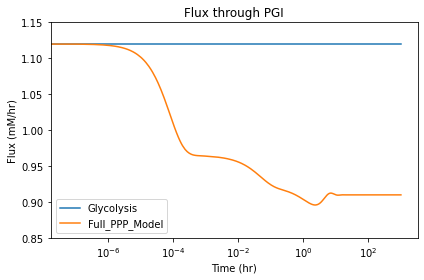

In [89]:
t0, tf = (0, 1e3)

fig_11_7, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))

for model in [glycolysis, fullppp]:
    sim = Simulation(model)
    flux_sol = sim.simulate(model, time=(t0, tf))[1]
    plot_time_profile(
        flux_sol, observable=["PGI"], ax=ax,
        legend=[model.id, "best"], plot_function="semilogx",
        xlabel="Time (hr)", ylabel="Flux (mM/hr)", ylim=(0.85, 1.15),
        title=("Flux through PGI", L_FONT))
fig_11_7.tight_layout()



In [90]:
# Define new order for metabolites
new_metabolite_order = ["glc__D_c", "g6p_c", "f6p_c", "fdp_c", "dhap_c",
                        "g3p_c", "_13dpg_c", "_3pg_c", "_2pg_c", "pep_c",
                        "pyr_c", "lac__L_c", "nad_c", "nadh_c", "amp_c",
                        "adp_c", "atp_c", "pi_c", "h_c", "h2o_c", "_6pgl_c", "_6pgc_c",
                        "ru5p__D_c", "xu5p__D_c", "r5p_c", "s7p_c", "e4p_c",
                        "nadp_c", "nadph_c", "gthrd_c", "gthox_c", "co2_c"]
if len(fullppp.metabolites) == len(new_metabolite_order):
    fullppp.metabolites = DictList(fullppp.metabolites.get_by_any(new_metabolite_order))
# Define new order for reactions
new_reaction_order = ["HEX1", "PGI", "PFK", "FBA", "TPI",
                      "GAPD", "PGK", "PGM", "ENO", "PYK",
                      "LDH_L", "DM_amp_c", "ADK1", "SK_pyr_c",
                      "SK_lac__L_c", "ATPM", "DM_nadh", "SK_glc__D_c",
                      "SK_amp_c", "SK_h_c", "SK_h2o_c",
                      "G6PDH2r", "PGL", "GND", "RPE", "RPI",
                      "TKT1", "TKT2", "TALA", "GTHOr", "GSHR", "SK_co2_c"]
if len(fullppp.reactions) == len(new_reaction_order):
    fullppp.reactions = DictList(fullppp.reactions.get_by_any(new_reaction_order))



In [91]:
metabolite_ids = [m.id for m in fullppp.metabolites]
reaction_ids = [r.id for r in fullppp.reactions]
# MinSpan pathways are calculated outside this notebook and the results are provided here.
# Make table content from the stoichiometric matrix, elemental balancing of pathways
# participation number, and MinSpan pathways
S_matrix = fullppp.update_S(array_type="dense", dtype=np.int64, update_model=False)
ES_matrix = fullppp.get_elemental_charge_balancing(dtype=np.int64)
pi = np.count_nonzero(S_matrix, axis=0)
rho = np.count_nonzero(S_matrix, axis=1)
minspan_paths = np.array([
    [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0,-1, 0, 0, 1,-1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1,-2, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,13,-3, 3, 3, 3, 2, 1, 1, 1, 1, 6, 6, 3]])

table_11_11 = np.vstack((S_matrix, pi, ES_matrix, minspan_paths))


In [92]:
# Set independent fluxes to determine steady state flux vector
independent_fluxes = {
    fullppp.reactions.SK_glc__D_c: 1.12,
    fullppp.reactions.DM_nadh: .2*1.12,
    fullppp.reactions.SK_amp_c: 0.014,
    fullppp.reactions.GTHOr: 0.42}

ssfluxes = fullppp.compute_steady_state_fluxes(
    minspan_paths,
    independent_fluxes,
    update_reactions=True)
table_11_12 = pd.DataFrame(list(ssfluxes.values()), index=reaction_ids,
                           columns=[r"$\textbf{v}_{\mathrm{stst}}$"]).T

print("Steady State Fluxes\n-------------------")
for reaction, steady_state_flux in fullppp.steady_state_fluxes.items():
    print("{0}: {1:.6f}".format(reaction.flux_symbol_str, steady_state_flux))

Steady State Fluxes
-------------------
v_HEX1: 1.120000
v_PGI: 0.910000
v_PFK: 1.050000
v_FBA: 1.050000
v_TPI: 1.050000
v_GAPD: 2.170000
v_PGK: 2.170000
v_PGM: 2.170000
v_ENO: 2.170000
v_PYK: 2.170000
v_LDH_L: 1.946000
v_DM_amp_c: 0.014000
v_ADK1: 0.000000
v_SK_pyr_c: 0.224000
v_SK_lac__L_c: 1.946000
v_ATPM: 2.170000
v_DM_nadh: 0.224000
v_SK_glc__D_c: 1.120000
v_SK_amp_c: 0.014000
v_SK_h_c: 3.458000
v_SK_h2o_c: -0.210000
v_G6PDH2r: 0.210000
v_PGL: 0.210000
v_GND: 0.210000
v_RPE: 0.140000
v_RPI: 0.070000
v_TKT1: 0.070000
v_TKT2: 0.070000
v_TALA: 0.070000
v_GTHOr: 0.420000
v_GSHR: 0.420000
v_SK_co2_c: 0.210000


In [93]:
pd.DataFrame(
    fullppp.S.dot(np.array(list(ssfluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"]).T

,glc__D_c,g6p_c,f6p_c,fdp_c,dhap_c,g3p_c,_13dpg_c,_3pg_c,_2pg_c,pep_c,pyr_c,lac__L_c,nad_c,nadh_c,amp_c,adp_c,atp_c,pi_c,h_c,h2o_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c
$\textbf{Sv}_{\mathrm{stst}}$,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [94]:
for metabolite, ic_value in fullppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))

ic_info = pd.DataFrame()
met_list =[]
met_conc = []
print("Initial Conditions\n------------------")
for metabolite, ic_value in fullppp.initial_conditions.items():
    print("{0}: {1}".format(metabolite, ic_value))
    met_list.append(str(metabolite))
    met_conc.append(ic_value)

ic_info["metabolite"] = met_list
ic_info["concentrations"] = met_conc

glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2_c: 1
Initial Conditions
------------------
glc__D_c: 1.0
g6p_c: 0.0486
f6p_c: 0.0198
fdp_c: 0.0146
dhap_c: 0.16
g3p_c: 0.00728
_13dpg_c: 0.000243
_3pg_c: 0.0773
_2pg_c: 0.0113
pep_c: 0.017
pyr_c: 0.060301
lac__L_c: 1.36
nad_c: 0.0589
nadh_c: 0.0301
amp_c: 0.0867281
adp_c: 0.29
atp_c: 1.6
pi_c: 2.5
h_c: 8.99757e-05
h2o_c: 1.0
_6pgl_c: 0.00175424
_6pgc_c: 0.0374753
ru5p__D_c: 0.00493679
xu5p__D_c: 0.0147842
r5p_c: 0.0126689
s7p_c: 0.023988
e4p_c: 0.00507507
nadp_c: 0.0002
nadph_c: 0.0658
gthrd_c: 3.2
gthox_c: 0.12
co2

In [95]:
ic_info=ic_info.set_index('metabolite')
ic_info

,concentrations
metabolite,
glc__D_c,1.000
g6p_c,0.049
f6p_c,0.020
fdp_c,0.015
dhap_c,0.160
g3p_c,0.007
_13dpg_c,0.000
_3pg_c,0.077
_2pg_c,0.011


### Running Concentration QP

In [96]:
for metabolite in ["h2o_c"]:
    metabolite = fullppp.metabolites.get_by_id(metabolite)
    metabolite.ic = 1 #M

In [98]:
#Formulate QP minimization list for concentrations
conc_solver = ConcSolver(
    fullppp,
    excluded_reactions=["DM_nadh"],
    constraint_buffer=1)

conc_solver.setup_feasible_qp_problem(
fixed_conc_bounds=list(fullppp.fixed))
# fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    
#assumption: provide uncertainity to allow for a variance for the Keqs rather than staying fixed
conc_solver.setup_feasible_qp_problem(Keq_percent_deviation=0.1)

conc_solution = conc_solver.optimize()
conc_solution

['ADK1']
mass\util\util.py:159 UserWarning: Unrecognized kwargs: ['Keq_percent_deviation']
mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,variables,reduced_costs
glc__D_c,1.000,0.000
g6p_c,0.063,0.000
f6p_c,0.012,0.000
fdp_c,0.018,0.000
dhap_c,0.162,0.000
...,...,...
Keq_TKT1,1.580,0.000
Keq_TKT2,10.300,0.000
Keq_TALA,1.328,0.000
Keq_GTHOr,152.144,0.000


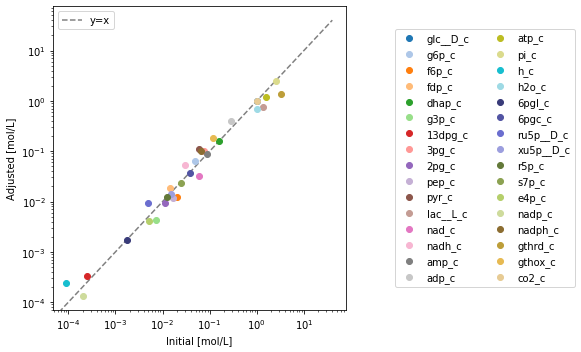

In [99]:
conc_comparison_fig, ax = plt.subplots(nrows=1, ncols=1,
                                       figsize=(5, 5))

plot_comparison(
    x=ic_info["concentrations"], y=conc_solution,
    compare="concentrations",
    observable=[mid for mid in ic_info.index], ax=ax,
    legend="right outside", plot_function="loglog",
    # xlim=(1e-6,0.02), ylim=(1e-6,1e-1),
    xy_line=True,
    xy_legend="best", xlabel="Initial [mol/L]", ylabel="Adjusted [mol/L]")

conc_comparison_fig.tight_layout()


In [ ]:
# update_model_with_concentration_solution(
#     fullppp, conc_solution, concentrations=True, inplace=True);

In [100]:
conc_solution_adjusted = conc_solution.to_frame()
conc_fig_df = pd.DataFrame()
conc_fig_df["Initial"] = ic_info["concentrations"]
conc_fig_df["Adjusted"] = conc_solution_adjusted["variables"]
conc_fig_df["Metabolite"] = ic_info.index
# conc_fig_df

mass\thermo\conc_solution.py:98 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
mass\thermo\conc_solution.py:99 FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


In [101]:
line_min = conc_fig_df.min()
line_min

Initial          0.000
Adjusted         0.000
Metabolite    _13dpg_c
dtype: object

In [102]:
conc_fig_comp = alt.Chart(conc_fig_df).mark_circle(size= 100).encode(
    alt.X("Initial", axis=alt.Axis( tickCount=0), scale=alt.Scale(type='log')),
    alt.Y('Adjusted',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('Metabolite', scale=alt.Scale(scheme='turbo')), 
    tooltip=['Metabolite', "Initial", "Adjusted"]
).properties(
    width=400,
    height=400).interactive()
conc_fig_comp

alt.Chart(...)

 Getting Standard and Physiological Gibbs energies of reactions

In [103]:
#  possibly running comparison tests b/w equilibrator and published values?


Caluclation of percs

In [104]:
percs = fullppp.calculate_PERCs(update_reactions=True)

print("Forward Rate Constants\n----------------------")
for reaction in fullppp.reactions:
    print("{0}: {1:.6f}".format(reaction.kf_str, reaction.kf))

percs_df = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])


Forward Rate Constants
----------------------
kf_HEX1: 0.700007
kf_PGI: 2961.111111
kf_PFK: 33.158235
kf_FBA: 2657.407407
kf_TPI: 32.208495
kf_GAPD: 3271.225828
kf_PGK: 1233733.417562
kf_PGM: 4716.445884
kf_ENO: 1708.623634
kf_PYK: 440.186003
kf_LDH_L: 1073.942947
kf_DM_amp_c: 0.161424
kf_ADK1: 100000.000000
kf_SK_pyr_c: 744.186047
kf_SK_lac__L_c: 5.405556
kf_ATPM: 1.356250
kf_DM_nadh: 7.441860
kf_SK_glc__D_c: 1.120000
kf_SK_amp_c: 0.014000
kf_SK_h_c: 128645.833333
kf_SK_h2o_c: 100000.000000
kf_G6PDH2r: 21864.589249
kf_PGL: 122.323112
kf_GND: 29287.807474
kf_RPE: 16048.910967
kf_RPI: 9645.957438
kf_TKT1: 1675.749573
kf_TKT2: 1146.858757
kf_TALA: 886.846945
kf_GTHOr: 53.329812
kf_GSHR: 0.041257
kf_SK_co2_c: 100000.000000


### Perc sampling

In [105]:
seed = int(1)
n_models = 1500

first trying with 1 order of magnitude

In [106]:
conc_solver.setup_sampling_problem(
    fixed_conc_bounds=list(fullppp.fixed),
    # fixed_Keq_bounds=liver.reactions.list_attr("Keq_str")
    )
for variable in conc_solver.variables:
    try:
        met = fullppp.metabolites.get_by_id(variable.name)
        variable.lb, variable.ub = np.log([met.ic / 5, met.ic * 5])
    except:
        pass
conc_samples = sample_concentrations(conc_solver, n=n_models,  processes=8, seed=seed)
conc_samples.head()


Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp11rjstca.lp
Reading time = 0.00 seconds
: 32 rows, 64 columns, 198 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpoj85zvmw.lp
Reading time = 0.00 seconds
: 21 rows, 53 columns, 101 nonzeros


,glc__D_c,g6p_c,f6p_c,fdp_c,dhap_c,g3p_c,_13dpg_c,_3pg_c,_2pg_c,pep_c,pyr_c,lac__L_c,nad_c,nadh_c,amp_c,adp_c,atp_c,pi_c,h_c,h2o_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c
0,0.981,0.076,0.004,0.008,0.135,0.002,0.000,0.162,0.009,0.005,0.058,0.534,0.030,0.129,0.063,0.839,0.614,1.472,0.000,1.024,0.001,0.021,0.018,0.008,0.007,0.015,0.003,0.000,0.194,1.397,0.079,0.208
1,0.687,0.098,0.008,0.015,0.188,0.003,0.000,0.324,0.017,0.009,0.100,0.911,0.015,0.106,0.024,0.808,0.490,1.626,0.000,1.043,0.001,0.030,0.017,0.012,0.008,0.021,0.003,0.000,0.127,1.081,0.069,0.244
2,0.710,0.214,0.010,0.016,0.174,0.003,0.000,0.375,0.007,0.004,0.072,0.279,0.012,0.133,0.023,1.410,0.351,1.299,0.000,0.923,0.001,0.036,0.017,0.013,0.008,0.016,0.002,0.000,0.184,0.697,0.059,0.251
3,0.981,0.148,0.012,0.016,0.201,0.003,0.000,0.194,0.009,0.007,0.092,0.293,0.048,0.097,0.035,0.781,0.680,1.209,0.000,0.785,0.001,0.030,0.013,0.013,0.007,0.018,0.001,0.000,0.178,0.795,0.082,0.342
4,0.644,0.181,0.005,0.010,0.207,0.002,0.000,0.299,0.009,0.004,0.052,0.441,0.028,0.113,0.031,0.565,0.389,1.556,0.000,1.284,0.000,0.036,0.015,0.009,0.007,0.022,0.002,0.000,0.210,0.847,0.056,0.337


In [107]:
conc_samples

,glc__D_c,g6p_c,f6p_c,fdp_c,dhap_c,g3p_c,_13dpg_c,_3pg_c,_2pg_c,pep_c,pyr_c,lac__L_c,nad_c,nadh_c,amp_c,adp_c,atp_c,pi_c,h_c,h2o_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c
0,0.981,0.076,0.004,0.008,0.135,0.002,0.000,0.162,0.009,0.005,0.058,0.534,0.030,0.129,0.063,0.839,0.614,1.472,0.000,1.024,0.001,0.021,0.018,0.008,0.007,0.015,0.003,0.000,0.194,1.397,0.079,0.208
1,0.687,0.098,0.008,0.015,0.188,0.003,0.000,0.324,0.017,0.009,0.100,0.911,0.015,0.106,0.024,0.808,0.490,1.626,0.000,1.043,0.001,0.030,0.017,0.012,0.008,0.021,0.003,0.000,0.127,1.081,0.069,0.244
2,0.710,0.214,0.010,0.016,0.174,0.003,0.000,0.375,0.007,0.004,0.072,0.279,0.012,0.133,0.023,1.410,0.351,1.299,0.000,0.923,0.001,0.036,0.017,0.013,0.008,0.016,0.002,0.000,0.184,0.697,0.059,0.251
3,0.981,0.148,0.012,0.016,0.201,0.003,0.000,0.194,0.009,0.007,0.092,0.293,0.048,0.097,0.035,0.781,0.680,1.209,0.000,0.785,0.001,0.030,0.013,0.013,0.007,0.018,0.001,0.000,0.178,0.795,0.082,0.342
4,0.644,0.181,0.005,0.010,0.207,0.002,0.000,0.299,0.009,0.004,0.052,0.441,0.028,0.113,0.031,0.565,0.389,1.556,0.000,1.284,0.000,0.036,0.015,0.009,0.007,0.022,0.002,0.000,0.210,0.847,0.056,0.337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,0.606,0.113,0.007,0.012,0.180,0.002,0.000,0.357,0.005,0.009,0.151,0.407,0.044,0.074,0.101,1.088,0.437,1.052,0.000,0.270,0.001,0.092,0.014,0.015,0.009,0.031,0.003,0.000,0.088,0.782,0.207,2.819
1500,0.600,0.108,0.006,0.012,0.221,0.002,0.000,0.257,0.004,0.006,0.154,0.568,0.033,0.037,0.074,1.235,0.374,1.285,0.000,0.259,0.001,0.151,0.017,0.014,0.009,0.036,0.003,0.000,0.106,0.732,0.148,3.117
1501,0.467,0.094,0.009,0.015,0.272,0.002,0.000,0.166,0.002,0.005,0.144,0.450,0.027,0.046,0.074,1.129,0.441,0.934,0.000,0.201,0.001,0.113,0.017,0.017,0.008,0.037,0.002,0.000,0.148,0.729,0.173,2.128
1502,0.244,0.142,0.009,0.017,0.236,0.002,0.000,0.330,0.003,0.004,0.062,0.388,0.024,0.064,0.110,0.962,0.474,0.802,0.000,0.305,0.001,0.172,0.023,0.015,0.014,0.048,0.003,0.001,0.202,0.792,0.282,2.781


In [108]:
boundary_metabolites = []
for m in fullppp.boundary:
    for i in (m.metabolites.keys()):
        if str(i) not in boundary_metabolites:
            boundary_metabolites.append(str(i))
            print(i)

amp_c
pyr_c
lac__L_c
glc__D_c
h_c
h2o_c
co2_c


In [109]:
metabolite_ids = [m.id for m in fullppp.metabolites]
misbalance= pd.DataFrame(
    fullppp.S.dot(np.array(list(fullppp.steady_state_fluxes.values()))),
    index=metabolite_ids,
    columns=[r"$\textbf{Sv}_{\mathrm{stst}}$"])
misbalance.T

,glc__D_c,g6p_c,f6p_c,fdp_c,dhap_c,g3p_c,_13dpg_c,_3pg_c,_2pg_c,pep_c,pyr_c,lac__L_c,nad_c,nadh_c,amp_c,adp_c,atp_c,pi_c,h_c,h2o_c,_6pgl_c,_6pgc_c,ru5p__D_c,xu5p__D_c,r5p_c,s7p_c,e4p_c,nadp_c,nadph_c,gthrd_c,gthox_c,co2_c
$\textbf{Sv}_{\mathrm{stst}}$,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,-0.000,0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [110]:
# Determine imbalances in the reduced network
fluxes = np.array(list(fullppp.steady_state_fluxes.values()))
imbalanced_metabolites = (fullppp.S.dot(fluxes))
imbalanced_metabolites

glc__D_c     0.000
g6p_c        0.000
f6p_c       -0.000
fdp_c        0.000
dhap_c       0.000
g3p_c        0.000
_13dpg_c     0.000
_3pg_c       0.000
_2pg_c       0.000
pep_c        0.000
pyr_c       -0.000
lac__L_c     0.000
nad_c        0.000
nadh_c      -0.000
amp_c        0.000
adp_c        0.000
atp_c        0.000
pi_c         0.000
h_c          0.000
h2o_c        0.000
_6pgl_c      0.000
_6pgc_c      0.000
ru5p__D_c    0.000
xu5p__D_c    0.000
r5p_c        0.000
s7p_c        0.000
e4p_c        0.000
nadp_c       0.000
nadph_c      0.000
gthrd_c      0.000
gthox_c      0.000
co2_c        0.000
dtype: float64

In [111]:
# Iterate through metabolites
for mid, imbalance in imbalanced_metabolites.iteritems():
    # print(mid)
    met = fullppp.metabolites.get_by_id(mid)
    if imbalance != (0.000):
        if str(mid) not in boundary_metabolites:
            print(mid)

g6p_c
f6p_c
g3p_c
nad_c
nadh_c


In [112]:
models_for_ensemble = []
for idx, conc_sample in conc_samples.iterrows():
    # Make copy of new model
    new_model = fullppp.copy()
    new_model.id += "_C{0:d}".format(idx)
    # Get concentration sample and update model with sample
    new_model.update_initial_conditions(conc_sample.to_dict())

    # Determine imbalances in the reduced network
    fluxes = np.array(list(new_model.steady_state_fluxes.values()))
    imbalanced_metabolites = new_model.S.dot(fluxes)

    # Iterate through metabolites
    for mid, imbalance in imbalanced_metabolites.iteritems():
        # Ignore balanced metabolites
        if imbalance == 0:
            continue
        # Get metabolite object
        met = new_model.metabolites.get_by_id(mid)
        if str(mid) not in boundary_metabolites:
            # print(mid)
            # Add boundary reactions for imbalanced metabolites
            boundary_type = "sink"    
            # Add boundary reaction with imbalance as flux value
            boundary_reaction = new_model.add_boundary(
                mid, boundary_type, boundary_condition=met.ic)

            boundary_reaction.Keq = 1
            if imbalance < 0:
                boundary_reaction.reverse_stoichiometry(inplace=True)
                imbalance = -imbalance

            boundary_reaction.kf = imbalance / met.ic
            boundary_reaction.steady_state_flux = imbalance
        try:
            # Update PERCs
            percs = new_model.calculate_PERCs(
                fluxes={
                    r: v for r, v in new_model.steady_state_fluxes.items()
                    if not r.boundary},
                update_reactions=False)
            print(percs)
        except:
            print("Negative PERCs for {0}".format(new_model.id))
            print(percs)
            continue




    df_p = pd.DataFrame.from_dict(percs, orient='index')
    df_p.columns = [("No."+ str(idx))]
    percs_df = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)

    models_for_ensemble.append(new_model)
print("Number of models in ensemble: {0:d}".format(
    len(models_for_ensemble)))

Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmpk3oleb1m.lp
Reading time = 0.01 seconds
: 32 rows, 64 columns, 198 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp23skuftu.lp
Reading time = 0.00 seconds
: 32 rows, 64 columns, 198 nonzeros
Read LP format model from file C:\Users\sicil\AppData\Local\Temp\tmp7b1fa907.lp
Reading time = 0.00 seconds
: 21 rows, 53 columns, 101 nonzeros
{'kf_HEX1': 1.8591914072678275, 'kf_PGI': 14.005884913462662, 'kf_PFK': 395.6040771291299, 'kf_FBA': 213.67635399058878, 'kf_TPI': 10.395626587052009, 'kf_GAPD': -892.1128566233294, 'kf_PGK': 9101.550753512443, 'kf_PGM': 21.19247301765084, 'kf_ENO': 364.00996337952677, 'kf_PYK': 555.1596368191966, 'kf_LDH_L': 261.69308639696663, 'kf_ADK1': 100000.0, 'kf_ATPM': 3.5326717489964343, 'kf_DM_nadh': 1.7397079876273924, 'kf_G6PDH2r': 26707.09914018606, 'kf_PGL': 161.48968996956472, 'kf_GND': 139313.73194155208, 'kf_RPE': 9.227697995857945, 'kf_RPI': 4.533505654448346, 

#### Trying to simulate

In [60]:
# percs = glycolysis.calculate_PERCs(update_reactions=True)
# percs_df_sim = pd.DataFrame.from_dict(percs, orient='index', columns = ["OG"])

In [61]:
# # Ensure all models are simulated to a long time and that
# # there are enough time points to determine if model reached steady state.
# tfinal = 1e4
# verbose = False
# sim = Simulation(reference_model=models_for_ensemble[0], verbose=verbose)
# sim.add_models(models_for_ensemble[1:], verbose=verbose, disable_safe_load=True)
# sim.integrator.absolute_tolerance = 1e-15
# sim.integrator.relative_tolerance = 1e-9

# models_to_export = []
# with warnings.catch_warnings():
#     warnings.simplefilter("ignore")
#     for model in models_for_ensemble:
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal, 
#             verbose=verbose)
#         if conc_sol and flux_sol:
#             continue
#         print(str(model) + " first attempt failed.")
#         # First attempt was not successful, lengthen time for second attempt
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal * 10, 
#             verbose=verbose)
#         if conc_sol and flux_sol:
#             continue
#         print(str(model) + " second attempt failed.")
#         # Second attempt was not successful, lengthen time for second attempt
#         # Attempt to determine steady state
#         conc_sol, flux_sol = sim.find_steady_state(
#             models=model, strategy="simulate", update_values=True,
#             tfinal=tfinal * 100, 
#             verbose=verbose)
        
#         if conc_sol and flux_sol:
#             sim_percs = pd.DataFrame()
#             for r in model.reactions:
#                 sim_percs.loc[len(sim_percs.index)] = [r.id, r.kf]
#                 sim_percs.columns = [("No."+ str(model))]
#             percs_df_sim = pd.merge(percs_df, df_p, how='inner', left_index=True, right_index=True)
#             continue
#         print(str(model) + " third attempt failed. Eliminating model.")
#         # Third attempt was not successful, eliminate the model
#         sim.remove_models(models=model, verbose=verbose)

In [62]:
# percs_df_sim

In [63]:
from mass.io.sbml import write_sbml_model
# from table_export import export_csv_files_for_models

In [64]:
# models_to_export = sim.get_model_objects(models=sim.models)
# for model in models_to_export:
#     # Save as JSON
#     save_json_mass_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "JSON", model.id + ".json")))
#     # Save as SBML
#     write_sbml_model(
#         mass_model=model,
#         filename=os.path.abspath(
#             os.path.join(
#                 model_dir, "SBML", model.id + ".xml.zip")))
# Export tables
# export_csv_files_for_models(
    # models_to_export)
# print("Number of models exported: {0:d}".format(len(sim.models)))

### Forming Percs Dataframe

In [ ]:
percs_df.index.names = ['RXN']
percs_df

,OG,No.0,No.1,No.2,No.3,No.4,No.5,No.6,No.7,No.8,No.9,No.10,No.11,No.12,No.13,No.14,No.15,No.16,No.17,No.18,No.19,No.20,No.21,No.22,No.23,No.24,No.25,No.26,No.27,No.28,No.29,No.30,No.31,No.32,No.33,No.34,No.35,No.36,No.37,No.38,No.39,No.40,No.41,No.42,No.43,No.44,No.45,No.46,No.47,No.48,...,No.1454,No.1455,No.1456,No.1457,No.1458,No.1459,No.1460,No.1461,No.1462,No.1463,No.1464,No.1465,No.1466,No.1467,No.1468,No.1469,No.1470,No.1471,No.1472,No.1473,No.1474,No.1475,No.1476,No.1477,No.1478,No.1479,No.1480,No.1481,No.1482,No.1483,No.1484,No.1485,No.1486,No.1487,No.1488,No.1489,No.1490,No.1491,No.1492,No.1493,No.1494,No.1495,No.1496,No.1497,No.1498,No.1499,No.1500,No.1501,No.1502,No.1503
RXN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kf_HEX1,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,0.700,...,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335,4.335
kf_PGI,"2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111","2,961.111",...,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623,7.623
kf_PFK,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,33.158,...,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307,564.307
kf_FBA,"2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407","2,657.407",...,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.848,202.

In [ ]:
csv_percs = os.path.join(data_dir,"rbc_percs_glyco_ppp.csv")
percs_df.to_csv(csv_percs)

### Percs Workflow

Log transforming it

In [ ]:
# csv_percs = os.path.join(data_dir,"percs_df.csv")
og_percs_df = pd.read_csv(csv_percs,index_col="RXN")
percs_df = og_percs_df.copy()
# csv_percs

In [ ]:
data_log = np.log(percs_df)
data_log

In [ ]:
from scipy import stats
from sklearn import cluster, metrics, decomposition # these will be useful
import seaborn as sns
import sklearn

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm

def PCA_cluster_plot(data, cluster_labels, ax = None):
    """
    Parameters:
        data: the pd.DataFrame of gene expression data
        cluster_labels: a pd.Series with a cluster label
            for each column of data
        ax: if None, draw a new figure. else, populate these axes.
    Returns:
        ax: the plt.axes object of a PCA plot labeled by cluster
    """
    
    # check for bad input
    if isinstance(cluster_labels, pd.Series):
        if not(cluster_labels.index.equals(data.columns)):
            raise ValueError('cluster_labels.index doesn\'t match data.columns')
    else:
        raise TypeError('cluster_labels isn\'t a pd.Series')
    
    # compute PCA, save as dataframe with condition labels
    # data_norm = stats.zscore(data, axis=1)
    data_norm = sklearn.preprocessing.normalize(data,norm='l2')
    data_pc = PCA().fit_transform(data_norm.T)
    data_pc = pd.DataFrame(data_pc, index = data.columns)
    
    # get the unique clusters (supports naming if desired)
    unique_clusters = np.sort(cluster_labels.unique())
    
    # prepare a long list of colors
    colors = ['tab:blue','tab:orange','tab:green','tab:red','tab:purple',
              'tab:brown','tab:pink','tab:gray','tab:olive', 'tab:cyan',
              'black', 'salmon', 'chocolate', 'orange', 'gold', 'lawngreen',
              'turquoise', 'steelblue', 'navy', 'violet', 'deeppink',
              'firebrick', 'sandybrown','olivedrab','darkgreen', 'aqua',
              'slategray', 'blue', 'fuschia', 'pink']
    
    # this code only runs if you have a ton of labels
    while len(colors) < len(cluster_labels.unique()):
        colors = colors + colors
    
    # make the plot
    if ax is None:
        fig, ax = plt.subplots()
    ax.set_xlabel('PC1', fontsize = 16)
    ax.set_ylabel('PC2', fontsize = 16)
    
    # iterate through each cluster label
    for clust, color in zip(unique_clusters, colors):
        
        # get the samples of this cluster
        samples = cluster_labels.index[cluster_labels == clust]
        
        # add to plot
        ax.scatter(data_pc.loc[samples, 0],
                   data_pc.loc[samples, 1],
                   label = clust, color = color)
    
    # add legend
    ax.legend(bbox_to_anchor = (1,0))
    for i in range(data_pc.shape[0]):
        plt.text(x=data_pc.iloc[i,0]+0.1,y=data_pc.iloc[i,1]+0.05,s=data_pc.index[i])
    return ax

In [ ]:
# create a DataFrame to store all the clusters
k_range = range(2, 10)
elbow_df = pd.DataFrame(index = data_log.index, 
                        columns = k_range)

# compute the clusters at each k
for k in k_range:
    
    # repeat code from problem 1.2.1
    k_clusters = cluster.KMeans(n_clusters = k, random_state = 1)
    k_clusters = k_clusters.fit(data_log)
    
    # store in DataFrame
    elbow_df[k] = k_clusters.labels_

In [ ]:
# compute the silhouette scores
k_silhouette = pd.Series(index = k_range, dtype=float)

for k in k_range:
    k_silhouette[k] = metrics.silhouette_score(data_log, elbow_df[k])
    
# plot
fig, ax = plt.subplots()
ax.plot(k_range, k_silhouette)

In [ ]:
# output, look at plot, and pick the best k
# I think it is k = 4
# so I'll draw it on now
# best_k = 4
# ax.scatter(best_k, k_silhouette[best_k], color = 'r', s = 50)
# ax.set_xlabel('K')
# ax.set_ylabel('Silhouette Score')

# print('Optimal K =', best_k)

In [ ]:
mean_silhouette = pd.Series(index = k_range, dtype=float)

# increase this number to make the curve smoother
# requires a lot of time to run
num_repeats = 10

for k in k_range:
    k_scs = []
    for i in range(num_repeats):
        # DO NOT specify a random state so we intentionally 
        # get different results
        k_clusters = cluster.KMeans(n_clusters = k)
        k_clusters = k_clusters.fit(percs_df.T)
        
        # add this silhouette score
        k_scs += [metrics.silhouette_score(percs_df.T, k_clusters.labels_)]
    
    # take the mean silhouette score
    mean_silhouette[k] = np.mean(k_scs)

In [ ]:
X = percs_df
distorsions = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

In [ ]:
fig, ax = plt.subplots()
ax.plot(k_range, mean_silhouette)
ax.set_xlabel('K')
ax.set_ylabel('Mean Silhouette Score')


# this reduces our k slightly
best_k = 5
ax.scatter(best_k, mean_silhouette[best_k], color = 'r', s = 50)

In [ ]:
k10_clusters = cluster.KMeans(n_clusters =5, random_state = 1)

# compute the clusters
# use the transpose of the data to get samples instead of genes
k10_clusters = k10_clusters.fit(data_log)

# label the output with condition names
k10_labels = pd.Series(k10_clusters.labels_, index = data_log.index)

In [ ]:
# ANSWER    

ax = PCA_cluster_plot(data_log.T, k10_labels)

In [ ]:
data_norm = sklearn.preprocessing.normalize(data_log.T,norm='l2')
data_pc = PCA().fit_transform(data_norm.T)
data_pc = pd.DataFrame(data_pc, index = data_log.index)
plot_data = data_pc.iloc[:,0:2]
plot_data.columns = ["PC1", "PC2"]
plot_data["RXN"] = plot_data.index
plot_data["clusters"] = k10_labels
alt.data_transformers.disable_max_rows()
fig = alt.Chart(plot_data).mark_circle(size= 100).encode(
    alt.X("PC1", axis=alt.Axis( tickCount=5)),
    alt.Y('PC2',axis=alt.Axis( tickCount=5), ), 

    alt.Color('clusters', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN']
).properties(
    width=400,
    height=400).interactive()
fig

In [ ]:
# loo

### Making distributions for percs

In [ ]:
data_norm = sklearn.preprocessing.normalize(percs_df,norm='l2')
data_norm= pd.DataFrame(data_norm)
data_norm = data_norm.T
data_norm.columns = [data_log.index]
data_norm

In [ ]:
data_vis = percs_df.T.melt()
data_vis.columns = ["RXN", "val"]

In [ ]:
alt.data_transformers.disable_max_rows()
fig = alt.Chart(data_vis).mark_circle(size= 100).encode(
    alt.X("RXN", axis=alt.Axis( tickCount=5), scale=alt.Scale(type='log')),
    alt.Y('val',axis=alt.Axis( tickCount=5), 
    scale=alt.Scale(type='log')), 

    alt.Color('RXN', scale=alt.Scale(scheme='turbo')), 
    tooltip=['RXN', "val"]
).properties(
    width=400,
    height=400).interactive()
fig

In [ ]:
data_vis_log = data_log.T.melt()
data_vis_log.columns = ["RXN", "val"]

In [ ]:
data_vis_log

In [ ]:
plt.figure(figsize= (15,5))
sns.violinplot(data=data_vis_log, 
               x = "RXN",
               y= "val" )


VP_sns = os.path.join(data_dir,"Violin_perc_dis_ppp.png")
# Saving figure by changing parameter values
plt.savefig(VP_sns, pad_inches=0.3)
plt.show()

In [ ]:
# # Violin Plot of percs distribution without log tranforming
# alt.data_transformers.disable_max_rows()
# alt.Chart(data_vis).transform_density(
#     'val',
#     as_=['Value_column', 'density'],    
#     extent=[-0.1, 1000],
#     groupby=['RXN']
#     ).mark_area(orient='horizontal').encode(
#     y=alt.Y('Value_column:Q',axis=alt.Axis(grid=False,ticks=True)),
#     color='RXN:N',
#     x=alt.X('density:Q', stack='center',impute=None,
#         title=None,
#         axis=alt.Axis(labels=False, values=[0],grid=False, ticks=True)),
#         tooltip=['RXN:N', "Value_column:Q"], 
#     column=alt.Column(
#         'RXN:N',header=alt.Header(
#             titleOrient='bottom',
#             labelOrient='bottom',
#             labelPadding=0))
# ).properties(
#     width=50).configure_facet(spacing=0).configure_view(stroke=None).interactive()

In [ ]:
pca = decomposition.PCA().fit(data_norm.T)

# get the two important matrices & label them in pandas
pc_genes = pd.DataFrame(pca.components_,
                        columns = data_norm.index)
pc_samples = pd.DataFrame(pca.transform(data_norm.T),
                          index = data_norm.columns)

# get the explained variance, which will be useful later
exp_var = pca.explained_variance_ratio_

In [ ]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
# get the cumulative variance
cum_var = exp_var.cumsum()

In [ ]:
cum_var

In [ ]:
plt.plot(PC_values, cum_var, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumultaive Variance Explained')
plt.show()

In [ ]:
# find the number of components
index_80 = sum(cum_var <= 0.8)

# indices are zero-indexed, so the total number is one more than this
print('Components to capture at least 80% of variance: ', index_80+1)

# add a zero at the start so the plot extends all the way down
cum_var_plot = [0] + list(cum_var)

# plot
fig, ax = plt.subplots()
ax.plot(range(len(cum_var_plot)), cum_var_plot, label = 'Cumulative Variance')

# add some lines to illustrate the question
ax.axhline(0.8, color = 'k', linestyle = '--', label = '80% Variance')
ax.axvline(index_80+1, color = 'g', linestyle = '--', label = str(index_80+1)+ ' components')

# limit the y axes
ax.set_ylim([0, 1])

# axes labels and legend
ax.set_xlabel('Number of Components', fontsize = 16)
ax.set_ylabel('Cumulative Variance Explained', fontsize = 14)
_ = ax.legend(fontsize = 12)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
df_st =  StandardScaler().fit_transform(percs_df.T)  
pd.DataFrame(df_st, columns=percs_df.T.columns).head(2)

In [ ]:
pca_out = PCA().fit(df_st)
pca_out.explained_variance_ratio_
np.cumsum(pca_out.explained_variance_ratio_)
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = percs_df.T.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

Generated correlation matrix plot for loadings

In [ ]:
plt.figure(figsize= (12,12))
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
heatmap_sns = os.path.join(data_dir,"heatmap.png")
# Saving figure by changing parameter values
plt.savefig(heatmap_sns, pad_inches=0.3)
plt.show()

In [ ]:
from sklearn import cluster, metrics, decomposition

In [ ]:
ica = decomposition.FastICA(n_components = None, random_state = 0)
A = ica.fit_transform(data_norm.T).transpose()

# these are the desired matrices
A = pd.DataFrame(A, columns = percs_df.index)
M = pd.DataFrame(ica.mixing_, index = percs_df.columns)

# reconstruct the data
data_norm_reconstructed = M.dot(A)

# compute the explained variance
ica_total_exp_var = metrics.explained_variance_score(
        data_norm, data_norm_reconstructed)
print('M*A explains %.2f%% of the variance in the data.'%(ica_total_exp_var*100))

In [ ]:
qcqa_model(ppp, parameters=True, concentrations=True,
           fluxes=True, superfluous=True, elemental=True)

In [ ]:
# Setup simulation object
sim = Simulation(ppp, verbose=True)
# Simulate from 0 to 1000 with 10001 points in the output
conc_sol, flux_sol = sim.simulate(ppp, time=(0, 1e3))
# Quickly render and display time profiles
conc_sol.view_time_profile()